<div class="alert alert-block alert-info" >
    <h1>Machine Learning: Assignment 4</h1>
    <h2>This is a two week assignment</h2>
    <h3>General Information:</h3>
    <p>Feel free to add cells if required.<br> Feel free to write your own function block to reduce the redundancy.<br> Answers belong into the corresponding cells (below the question). <br><br> If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.<br><br>When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via <i>Kernel -> Restart & Run All</i>). We don't consider that respective solution if you make this mistake (no excuse).</p>
    <br><br><b> Plot should have axis labels, grid, legend, title, atleast size 10X10 also give proper comments, function name, variable names to your coding, if you didn't follow the instructions there will be a reduction in the points.</b><br><br> 
     <br><br><b> Write sudo-code if you didn't get output or left out of time so that you will be awarded with atmost 50% of marks for that particular session.</b><br><br>
    <h3>Submission:</h3>
    <p>Use the following naming convention for your submissions: LA_FirstnameLastname_dateOfLecture, e.g LA_JohnDoe_YYMMDD
     <br><br>Please submit your notebook via LEA. The assignment is due on <b>$29^{th}$ May, Saturday at 18:00.</b> </p>
    <h3>Group Work:</h3>
    <p>You are allowed to work in groups of up to two people. Please enter the UID (your username here) of each member of the group into the next cell. We apply plagiarism checking, so do not submit solutions from other people except your team members. If an assignment has a copied solution, the task will be graded with 0 points for all people with the same solution.</p>
    <p><b>YOU SHOULD ONLY SUBMIT EXACTLY ONE PER GROUP</b></p>
    <h3>Questions about the Assignment:</h3>
    <p>If you have questions about the assignment please post them in the LEA forum before the deadline. Don't wait until the last day to post questions.</p></div>

In [1]:
'''
Group Work:
Enter the UID (i.e. student2s) of each team member into the variables. 
If you work alone please leave the second variable empty, or extend the list if necessary.
'''
member1 = 'Syed Mushrraf Ali (sali2s, 9040658)'
member2 = 'Shalaka Satheesh (ssathe2s, 9040760)'

# Classification [100 points]

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
#Import other libraries here

from scipy.stats import multivariate_normal
import collections
from sklearn.linear_model import LogisticRegression as LogisticRegressionSkLearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

# Task 1: Linear Discriminants [50 points]
### Read Lecture 5 to implement it

### 1. Create datapoints as follows [10 points]
- The points for the first class are sampled from the Gaussian distribution with the mean1 [0,4], 
- The points for the second class are sampled from the Gaussian distribution with the mean2 [3,3], 
- The covariance matrix $$\begin{bmatrix} 0.3 & 0.2 \\ 0.2 & 0.2 \end{bmatrix}$$ is the same for both distributions. 
- Create 300 sample for each class and visualise them, give different colors for two classes.

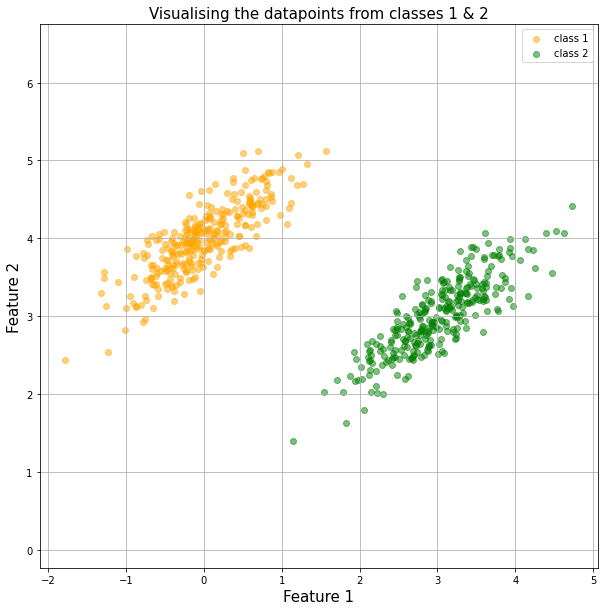

In [3]:
def generate_data_plot(mean1, mean2, cov, samples=300):
    '''
    Function to generate 2 data sets with the given 
    means and covariance matrix
    '''
    # Generate datapoints for class 1
    class_1 = np.random.multivariate_normal(mean1, cov, samples)
    
    # Generate datapoints for class 2
    class_2 = np.random.multivariate_normal(mean2, cov, samples)
    
    return class_1, class_2
    
def plot_data(data1, data2):
    '''
    Plot the points in the given datasets
    '''
    # Initialise figure for plotting
    fig = plt.figure(figsize=(10, 10))
    
    plt.scatter(class_1[:, 0], class_1[:, 1], color='orange', alpha=0.5, label = 'class 1')
    
    plt.scatter(class_2[:, 0], class_2[:, 1], color='green', alpha=0.5, label = 'class 2')

    # Visualise the data points
    plt.title('Visualising the datapoints from classes 1 & 2', fontsize=15)
    plt.grid()
    plt.xlabel('Feature 1', fontsize=15)
    plt.ylabel('Feature 2', fontsize=15)
    plt.legend()
    plt.axis('equal')
    plt.show()
    
# Define the covariance matrix and 
# the mean matrices for the classes 1 and 2
cov = np.array([[0.3, 0.2], [0.2, 0.2]])
mean1 = np.array([0, 4])
mean2 = np.array([3, 3])

# Call function to gererate data
class_1, class_2 = generate_data_plot(mean1, mean2, cov)

# Call function to plot data
plot_data(class_1, class_2)

### 2. Implement least-square classification method (you should write your own function no libraries except math ones like numpy). Only linear discriminant functions without any generalisation and plot the line separating these two classes, along with the previous plot [20 points]

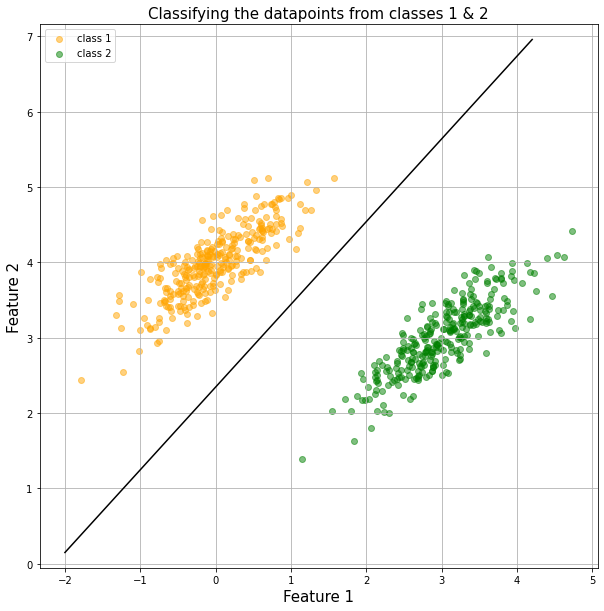

In [4]:
def least_square_fit(class_1, class_2, samples = 300):
    '''
    2 class least square classifier.
    
    Inputs
    ------
    class_1: dataset 1
    class_2: dataset_2
    samples: number of samples per class
    
    Outputs
    -------
    Slope: The slope of the classification boundary
    Intercept: The intercept of the classification boundary
    
    REFERENCES:
    -----------
    https://www.neonscience.org/resources/learning-hub/tutorials/classification-ols-python
    '''
    
    # Seed 
    np.random.seed(1)
    
    # Number of samples per class
    samples_per_class =  len(class_1)
    
    # Total number of samples from both classes
    samples = len(class_1) + len(class_2)
    
    # Generate outputs for each class. 
    # The outputs for the first class are fixed to be 1
    # The outputs for the second class are fixed to be -1
    TargetOutputs                            = np.ones((samples,1))
    TargetOutputs[samples_per_class:samples] = -TargetOutputs[samples_per_class:samples]
    
    # Find the weights for the least-square classification
    AllSamps     = np.concatenate((class_1,class_2),axis=0)
    AllSampsBias = np.concatenate((AllSamps, np.ones((samples,1))), axis=1)
    Pseudo       = np.linalg.pinv(AllSampsBias)
    w            = Pseudo.dot(TargetOutputs)
    y = AllSampsBias.dot(w)
    
    # Calculate the slope and intercept from the weights
    Slope     = -w[1]/w[0]
    Intercept = w[2]/w[0]
    
    return Slope, Intercept

def plot_data_boundary(class_1, class_2, Slope, Intercept, 
                       samples = 300, outliers = False, plot_outliers = True,
                       class_3 = None, Slope_1 = None, Intercept_1 = None):
    '''
    Function to plot the given datapoints with the
    classification boundary.
    
    Inputs:
    -------
    class_1:       dataset 1
    class_2:       dataset_2
    samples:       number of samples per class
    Slope:         The slope of the original classification boundary
    Intercept:     The intercept of the original classification boundary
    plot_outliers: Flag to plot outliers in separate color
    class_3:       data points of outliers
    Slope:         The slope of the classification boundary with outliers
    Intercept:     The intercept of the original classification boundary with outliers
    
    REFERENCES:
    -----------
    https://www.neonscience.org/resources/learning-hub/tutorials/classification-ols-python
    '''
    if not outliers:

        x    = np.linspace(-2,4.2, 60) 
        y    = Slope*x+Intercept

        fig = plt.figure(figsize=(10, 10))

        plt.scatter(class_1[:, 0], class_1[:, 1], color='orange', alpha=0.5, label = 'class 1')
        plt.scatter(class_2[:, 0], class_2[:, 1],  color='green', alpha=0.5, label = 'class 2')
        plt.plot(x, y, color = 'black')

        plt.title('Classifying the datapoints from classes 1 & 2', fontsize=15)
        plt.grid()
        plt.xlabel('Feature 1', fontsize=15)
        plt.ylabel('Feature 2', fontsize=15)
        plt.legend()
        plt.axis('equal')
        plt.show()
        
    if outliers:
       
        x    = np.linspace(-2,4.2, 60) 
        y    = Slope_1*x+Intercept_1


        fig = plt.figure(figsize=(10, 10))

        plt.scatter(class_1[:, 0], class_1[:, 1], color='orange', alpha=0.5, label = 'class 1')
        plt.scatter(class_2[:, 0], class_2[:, 1],  color='green', alpha=0.5, label = 'class 2')
        
        if plot_outliers:
            plt.scatter(class_3[:, 0], class_3[:, 1], color='green', alpha=0.5)
        plt.plot(x, y, color = 'red', label = 'new classification')
        plt.plot(x, Slope*x+Intercept, color = 'black', label = 'old classification')

        plt.title('Classifying the datapoints from classes 1 & 2 with outliers', fontsize=15)
        plt.grid()
        plt.xlabel('Feature 1', fontsize=15)
        plt.ylabel('Feature 2', fontsize=15)
        plt.legend()
        plt.axis('equal')
        plt.show()
    
    
Slope, Intercept = least_square_fit(class_1, class_2, samples = 300)
plot_data_boundary(class_1, class_2, Slope, Intercept)

### 3. Plot the outlier variations [20 points]

#### 3.1 Plot-1 [10 points]
- Add outliers (only to one class), namely too correct data points. Visualise how your decision boundary will be changed towards one class where the points are being added. **(look at first slide of Problems with Least Squares in lecture-5)**
- Plot the changed decision boundary along with the plot from step-2 show color differentiation for new boundary, old boundary, classes (outlier should have same color as the class).


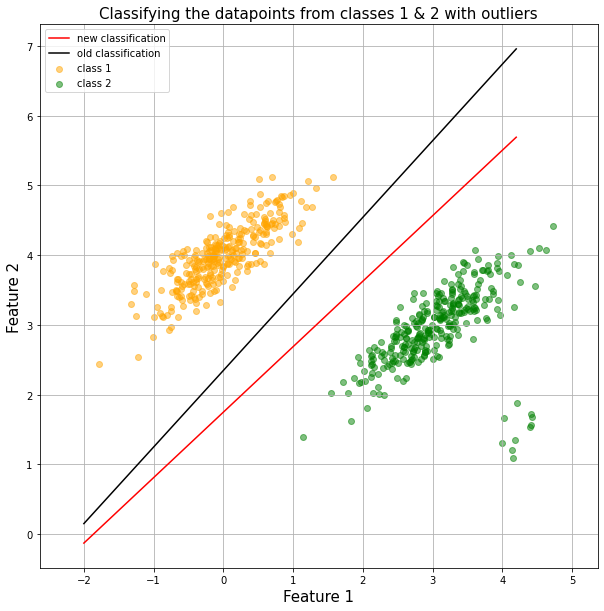

In [5]:
def random_points_generator(x_start, x_stop, y_start, y_stop, points):
    '''
    Function to generate random points
    as outliers. 
    
    Returns
    -------
    generated_points: generated points as a numpy array 
    '''
    
    generated_points = []
    for i in range(points):
        generated_points.append([np.random.uniform(x_start, x_stop),
                                np.random.uniform(y_start, y_stop)])
        
    generated_points = np.asarray(generated_points)
    return generated_points

class_3 = random_points_generator(4, 5, 1, 2, 10)
Slope, Intercept = least_square_fit(class_1, class_2, samples=300)
Slope_1, Intercept_1 = least_square_fit(class_1, np.concatenate((class_2, class_3),axis=0), samples=300)
plot_data_boundary(class_1, class_2, Slope, Intercept, 
                   samples = 300, outliers = True, 
                   class_3 = class_3, Slope_1 = Slope_1, Intercept_1 = Intercept_1)

#### 3.2 Plot-2 [10 points]
- Add outliers (both the classes, in the decision region), namely misclassified data points. Show that your decision boundary is sensitive to outliers. **(look at second slide of Problems with Least Squares in lecture-5)**

- Plot the changed decision boundary along with the plot from step-2 (dont merge with the plot in step 3.1) show color differentiation for new boundary, old boundary, classes (outlier should have same color as the class).

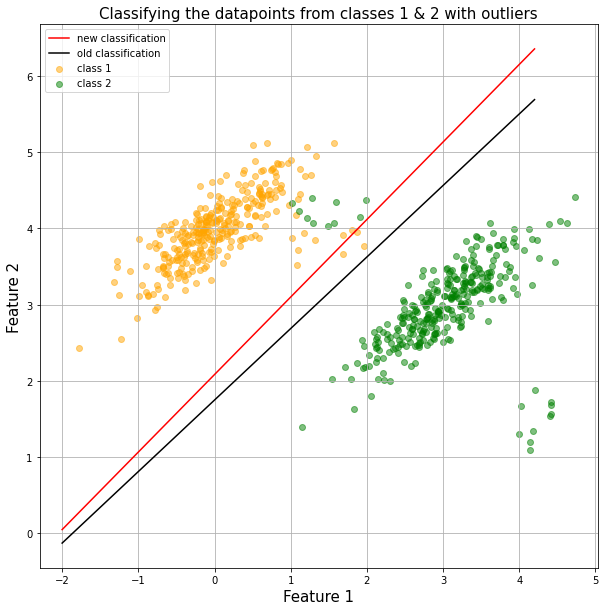

In [6]:
class_5 = random_points_generator(4, 5, 1, 2, 10) # Old outliers
class_3 = random_points_generator(1, 2, 3.5, 4, 10) # new outliers
class_4 = random_points_generator(1, 2, 4, 4.5, 10) # new outliers
Slope, Intercept = least_square_fit(class_1, np.concatenate((class_2, class_5)), samples=300)
Slope_1, Intercept_1 = least_square_fit(np.concatenate((class_1, class_3),axis=0), 
                                        np.concatenate((class_2, class_4),axis=0), samples=300)
plot_data_boundary(np.concatenate((class_1, class_3),axis=0), 
                   np.concatenate((class_2, class_4, class_5),axis=0), 
                   Slope, Intercept, 
                   samples = 300, outliers = True, 
                   plot_outliers = False, Slope_1 = Slope_1, Intercept_1 = Intercept_1)


# Task 2: Logistic Regression [50 points]
### Read Lecture 6 to implement it

### 1. Implement logistic regression from scratch, only with numpy library [30 points]
- Use diagnosis.csv dataset to build and validate it. Have "diagnosis" column / dimension as a label.
- Split train and test as 75-25% (no validation is required). Should not change the splitting percentage.
- should achieve accuracy more or equal to 95% (do necessary preprocessing if required)
- Give heat map for confusion matrix and classification report (As in second assignment)

In [7]:
class DataPreprocess:
    
    def __init__(self, path: str):
        self.dataset = pd.read_csv(path)
        
        # Drop rows with value NA
        self.dataset.dropna()
                 
    def extract_features(self, target_feature: str, features_to_drop: [(str)]):
        '''
        Inputs:
        -------
        dataset: pandas DataFrame containing all features
        target_feature: target feature as a string
        features_to_drop: list of features 

        '''
        X = self.dataset.drop(columns = features_to_drop, axis=1)
        y = self.dataset[target_feature]
        return X, y

    def feature_encoder(self, feature: pd.core.series.Series):
        '''
        Function to encode the binary feature variable to 0 and 1's.

        Inputs:
        -------
        feature: the feature variables

        Outputs:
        --------
        encoded_feature: numpy array containing the encoded output.
        '''

        encoded_feature = []

        if len(feature.unique()) > 2:
            feature_dict = dict()
            for i, country in enumerate(feature.unique()):
                feature_dict[country] = i
            for variable in feature:
                encoded_feature.append(feature_dict[variable])  
        else:
            for variable in feature:
                if variable == feature.unique()[0]:
                    encoded_feature.append(1)
                else:
                    encoded_feature.append(0)    
        return encoded_feature

    def plot_bar_chart(self, y: pd.core.series.Series):
        '''
        Function to visualise the
        distribution of data according
        to the target variable.

        References
        ----------
        https://stackoverflow.com/questions/28418988/how-
        to-make-a-histogram-from-a-list-of-strings-in-python
        '''
        counts = collections.Counter(y)
        df = pd.DataFrame.from_dict(counts, orient='index')
        df.plot(kind='bar')

    def enocde_categorical_data(self: pd.DataFrame) -> pd.DataFrame:
        '''
        Function to get the index of features which
        are categorical.

        Inputs:
        -------
        dataset: pd.DataFrame

        Returns:
        -------
        dataset: dataset containing the encoded output.
        '''
        cat_indices = []
        for i, item in enumerate(list(self.dataset.dtypes)):
            if item == object:
                cat_indices.append(i)

        for index in cat_indices:
            encoded_feature = []
            encoded_feature = (self.feature_encoder(self.dataset.iloc[:, [index]][self.dataset.iloc[:, [index]].columns.values[0]]))
            self.dataset[self.dataset.iloc[:, [index]].columns.values[0]] = encoded_feature

        return self.dataset
    
    def to_array(self, features: pd.DataFrame) -> np.ndarray:
        '''
        Function to convert a dataframe to a numpy array
        '''
        try: 
            column_names = features.columns.values.tolist()
            features = np.asarray(features[column_names])
        except:
            features = np.asarray(features)
        return features
    
    def normalise(self, features: np.ndarray) -> np.ndarray:
        '''
        Function to normalise features
        '''
        X_norm = []
        for feature in X.T:
            mean = np.mean(feature)
            var = np.var(feature) / np.max(feature) - np.min(feature)
            
            feature = (feature - mean) / var
            X_norm.append(feature)
            
        return np.asarray(X_norm).T
    
#Common Mistake:
#You should have "predict" separately as the existing libraries have
#otherwise it calculates the weight again for the test data
#think how to make it handy

In [8]:
class LogisticRegression:
    
    def __init__(self, learning_rate=0.01, iterations=100):
        self.iterations = iterations
        self.learning_rate = learning_rate
        
    def sigmoid(self, z: np.ndarray) -> np.ndarray:                                        
        return (1 / (1 + np.exp(-z)))
    
    def loss_func(self, X: np.ndarray, y: np.ndarray, weights: np.ndarray) -> float:
        '''
        Cross-entropy loss/Log loss
        
        Inputs
        ------
        X:       input features with shape (nxm).
                 n is the number of datapoints/examples,
                 m is the number of features.
        y:       predictions
        weights: weight matrix from preious iteration
        
        Returns
        -------
        cost:    calculated cross-entropy loss
        '''
        predictions = self.return_activations(X, weights)
        
        # Cost when y = 1 
        cost_y1 = -y * np.log(predictions)
        
        # Cost when y = 0 
        cost_y0 = (1-y) * np.log(1-predictions)
        
        # Sum of cost_y1 and cost_y0
        cost = cost_y1 - cost_y0
        
        # Averaging over the total cost
        cost = cost.sum() / len(y)
        
        return cost
        
    def return_activations(self, X: np.ndarray, weights: np.ndarray) -> np.ndarray:
        '''
        Inputs:
        -------
        X:       input features with shape (nxm).
                 n is the number of datapoints/examples,
                 m is the number of features.
        weights: matrix saving the weights from each iteration.
        
        Returns
        -------
        activations:  array containing the predictions.
        '''
        
        # Find the new prediction with the 
        # updated weight matrix
        z = np.dot(X, weights)
        activations = self.sigmoid(z)
        return activations
    
    def weight_update(self, X: np.ndarray, y: np.ndarray, weights: np.ndarray) -> np.ndarray:
        '''
        Inputs
        ------
        X:       input features with shape (nxm).
                 n is the number of datapoints/examples,
                 m is the number of features.
        y:       predictions
        weights: weight matrix from preious iteration
        
        Returns
        -------
        weights: updated weight after subtracting 
                 gradient
        '''
        # Predict with the current weights
        predictions = self.return_activations(X, weights)
        
        # Returns mx1 matrix which has a 'm' partial 
        # derivatives, one for each feature.
        # This represents the slope of the loss function
        # for all observations.
        gradient = np.dot(X.T, np.reshape(((predictions.T - y.T)), (len(X), 1))) 
        
        # Find the average cost derivative for each feature in X
        gradient = gradient / len(X)
        
        # Multiply with learning rate
        gradient = gradient * self.learning_rate
        
        # Minimise cost by subtracting gradient from weights
        weights = weights - gradient
        
        return weights


    def predict(self, X: np.ndarray) -> np.ndarray:
        '''
        Threshold is set as 0.5.
        Inputs
        ------
        X:       input features with shape (nxm).
                 n is the number of datapoints/examples,
                 m is the number of features.
        weights: weight matrix 
        
        Results:
        --------
        predicted_y: array containing predictions as classes
    
        '''
        predicted_y = []
        predictions = self.return_activations(X, self.weights)
        
        for prediction in predictions:
            if prediction >= 0.5:
                predicted_y.append(1)
            else:
                predicted_y.append(0)
        return predicted_y
    
    def fit(self, X, y, verbose = False):
        '''
        Function to train the model with given input features 
        and target features.
        
        Inputs
        ------
        X:       input features with shape (nxm).
                 n is the number of datapoints/examples,
                 m is the number of features.
        y:       predictions
        verbose: bool value which when True prints the Cross entropy loss
                 for every 10th epoch
        '''
        costs = []
        
        n, m = X.shape

        # initialise weights
        # weights = np.zeros((m, 1))
        np.random.seed(1)
        weights = 2*np.random.random((m,1)) - 1
        
        # update weights and calculate cost
        for i in range(self.iterations):
            weights = self.weight_update(X, y, weights)
            
            if verbose:
                cost = self.loss_func(X, y, weights)
                costs.append(cost)
                if (i % 10) == 0:
                    print('Cross entropy loss at epoch', i, '=', np.round(cost,2))
                    print('='*40)
            
        self.weights = weights
        print('='*20)
        print('Training completed.')
        print('='*20)

    def accuracy(self, predicted_labels: np.ndarray, y: np.ndarray) -> float:
        '''
        Function to calculate the accuracy of the model prediction
        
        Inputs:
        -------
        predicted_y: array containing predictions as classes
        y          : array containing actual classes
        
        Returns:
        --------
        accuracy:    accuracy value
        '''
        accuracy = 1.0 - (float(np.count_nonzero((predicted_labels - y))) / len((predicted_labels - y)))
        return accuracy

Training completed.

Accuracy from our model: 0.972

Classification report for our model
              precision    recall  f1-score   support

     class 1       0.97      0.99      0.98        89
     class 2       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143




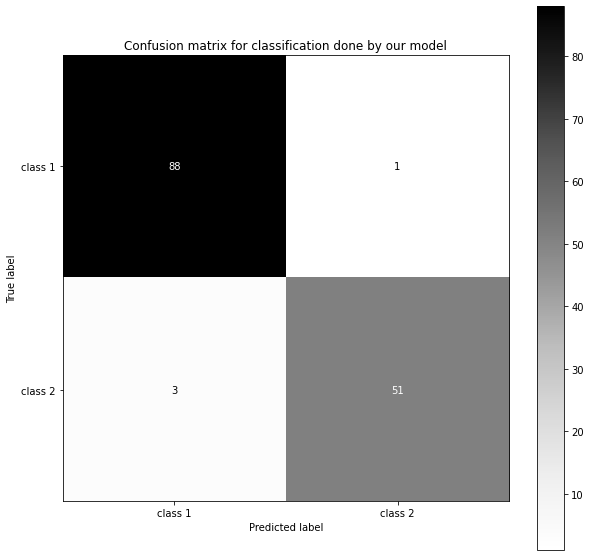

In [9]:
# Create class object
data_preprocess_object = DataPreprocess('diagnosis.csv')

# Encode categorical data
dataset = data_preprocess_object.enocde_categorical_data()

# Define features and target
X, y = data_preprocess_object.extract_features('diagnosis', ['id', 'diagnosis', 'Unnamed: 32'])

# data_preprocess_object.plot_bar_chart(y)

# Convert dataframe object to array
X = data_preprocess_object.to_array(X)
y = data_preprocess_object.to_array(y)

# Normalise features
X = data_preprocess_object.normalise(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# creating model object
log_regr_model = LogisticRegression(iterations=1000)

# training
log_regr_model.fit(X_train, y_train, verbose=False)

# predicting
predictions = log_regr_model.predict(X_test)

print()
print('Accuracy from our model:', np.round(log_regr_model.accuracy(predictions, y_test), 3))
print()
print('Classification report for our model')
print('='*35)
print(classification_report(y_test, predictions, target_names=['class 1', 'class 2']))
print()
fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['class 1', 'class 2'])
disp.plot(cmap=plt.cm.Greys, ax=ax) 
plt.title('Confusion matrix for classification done by our model')
plt.show()

### 2. Compare your implementation with the existing logistic regression algorithm given in python [10 points]

- Use the same training and testing data that you provided for the own implementation
- You should get a similar accuracy $\pm 2$ to your own implementation (someitmes less than your implementation).
- Give heat map for confusion matrix and classification report (As in second assignment)

/home/shalaka/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy from sklearn model: 0.972

Classification report for sklearn model
              precision    recall  f1-score   support

     class 1       0.99      0.97      0.98        89
     class 2       0.95      0.98      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143




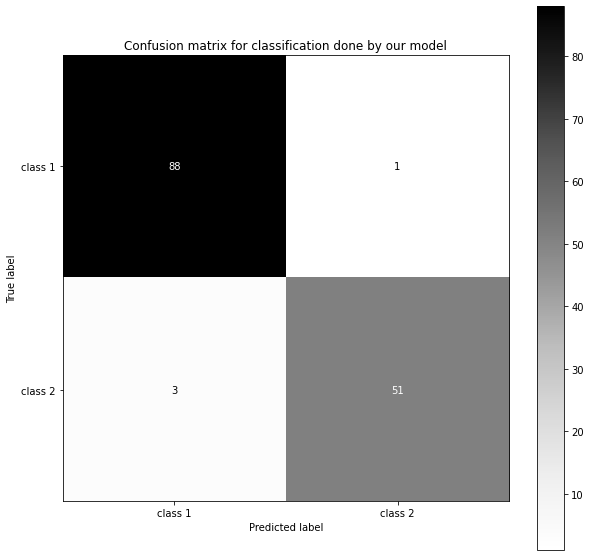

In [10]:
log_regr_model_sk_learn = LogisticRegressionSkLearn(random_state=0)
log_regr_model_sk_learn.fit(X_train, y_train)
predictions_sk_learn = log_regr_model_sk_learn.predict(X_test)
print('Accuracy from sklearn model:', np.round(log_regr_model_sk_learn.score(X_test, y_test), 3))
print()
print('Classification report for sklearn model')
print('='*40)
print(classification_report(y_test, predictions_sk_learn, target_names=['class 1', 'class 2']))
print()
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['class 1', 'class 2'])
disp.plot(cmap=plt.cm.Greys, ax=ax)
plt.title('Confusion matrix for classification done by our model')
plt.show()

### 3. Apply your own implementation to the other given data sets: [10 points]
#### 3.1. purchased.csv (dimension 'purchased' includes labels) [5 points]
- Split train and test as 75-25% (no validation is required). Should not change the splitting percentage.
- should achieve accuracy 89-92% (do necessary preprocessing if required)
- Give heat map for confusion matrix and classification report (As in second assignment)



Training completed.

Accuracy from our model for purchase.csv dataset: 0.94

Classification report for our model
              precision    recall  f1-score   support

     class 1       0.98      0.92      0.95        63
     class 2       0.88      0.97      0.92        37

    accuracy                           0.94       100
   macro avg       0.93      0.95      0.94       100
weighted avg       0.94      0.94      0.94       100




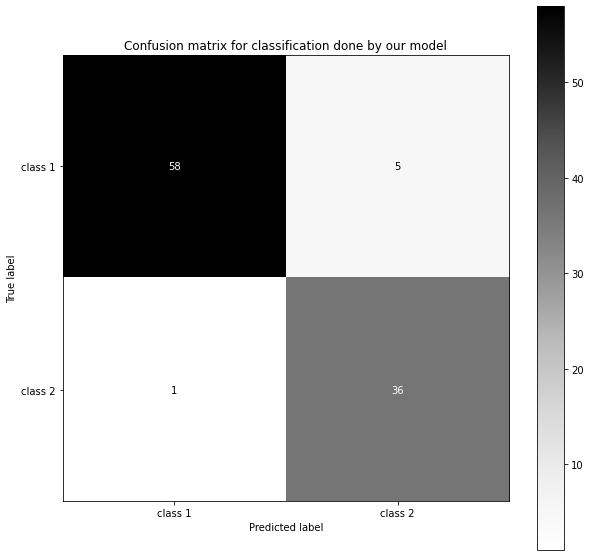

Accuracy from sklearn model for purchase.csv dataset: 0.96

Classification report for sklearn model
              precision    recall  f1-score   support

     class 1       0.95      0.98      0.97        63
     class 2       0.97      0.92      0.94        37

    accuracy                           0.96       100
   macro avg       0.96      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100




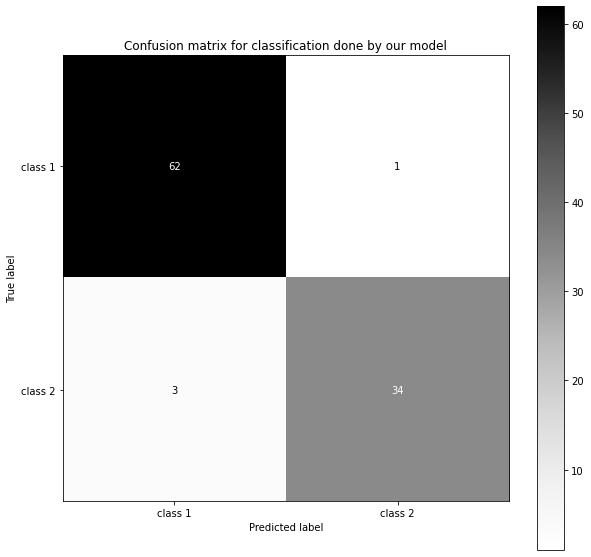

In [16]:
# Extract data
# Do preprocessing if required

# Create class object
data_preprocess_object = DataPreprocess('purchased.csv')

# Encode categorical data
dataset = data_preprocess_object.enocde_categorical_data()

# Define features and target
X, y = data_preprocess_object.extract_features('Purchased', ['User ID', 'Purchased'])

# Adding non-linear features so that more weightage is 
# given to non-linear features
X['SquareSalary'] = (X['EstimatedSalary'])**2

# print(X.columns)
# data_preprocess_object.plot_bar_chart(y)

# Convert dataframe object to array
X = data_preprocess_object.to_array(X)
y = data_preprocess_object.to_array(y)

# Normalise features
X = data_preprocess_object.normalise(X)


# call logistic regression
# Display the result

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# creating model object
log_regr_model = LogisticRegression(learning_rate=0.01, iterations=10000)

# training
log_regr_model.fit(X_train, y_train, verbose=False)

# predicting
predictions = log_regr_model.predict(X_test)

print()
print('Accuracy from our model for purchase.csv dataset:', np.round(log_regr_model.accuracy(predictions, y_test), 3))
print()
print('Classification report for our model')
print('='*35)
print(classification_report(y_test, predictions, target_names=['class 1', 'class 2']))
print()
fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['class 1', 'class 2'])
disp.plot(cmap=plt.cm.Greys,ax=ax) 
plt.title('Confusion matrix for classification done by our model')
plt.show()


log_regr_model_sk_learn = LogisticRegressionSkLearn(random_state=0)
log_regr_model_sk_learn.fit(X_train, y_train)
predictions_sk_learn = log_regr_model_sk_learn.predict(X_test)
print('Accuracy from sklearn model for purchase.csv dataset:', np.round(log_regr_model_sk_learn.score(X_test, y_test), 3))
print()
print('Classification report for sklearn model')
print('='*40)
print(classification_report(y_test, predictions_sk_learn, target_names=['class 1', 'class 2']))
print()
fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test, predictions_sk_learn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['class 1', 'class 2'])
disp.plot(cmap=plt.cm.Greys,ax=ax) 
plt.title('Confusion matrix for classification done by our model')
plt.show()

#### 3.2. advertising.csv (dimension 'Clicked on Ad' includes labels) [5 points]
- Split train and test as 75-25% (no validation is required). Should not change the splitting percentage.
- should achieve accuracy more or equal to 95% (do necessary preprocessing if required)
- Give heat map for confusion matrix and classification report (As in second assignment)

Training completed.

Accuracy from our model for purchase.csv dataset: 0.95

Classification report for our model
              precision    recall  f1-score   support

     class 1       0.93      0.97      0.95       120
     class 2       0.97      0.93      0.95       130

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250




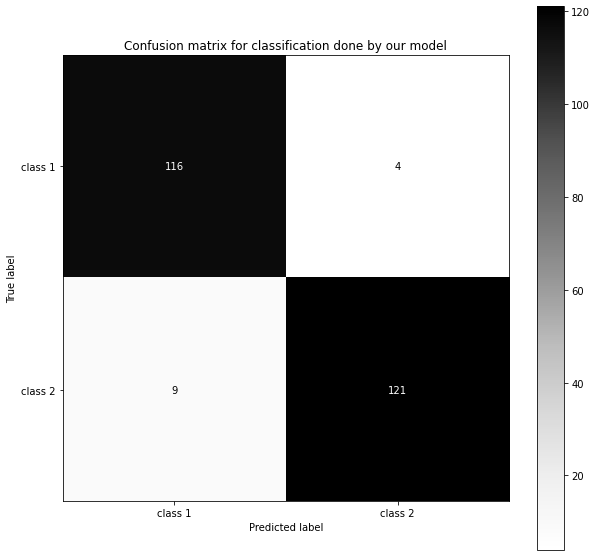

Accuracy from sklearn model for purchase.csv dataset:: 0.94

Classification report for sklearn model
              precision    recall  f1-score   support

     class 1       0.93      0.94      0.94       120
     class 2       0.95      0.94      0.94       130

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250




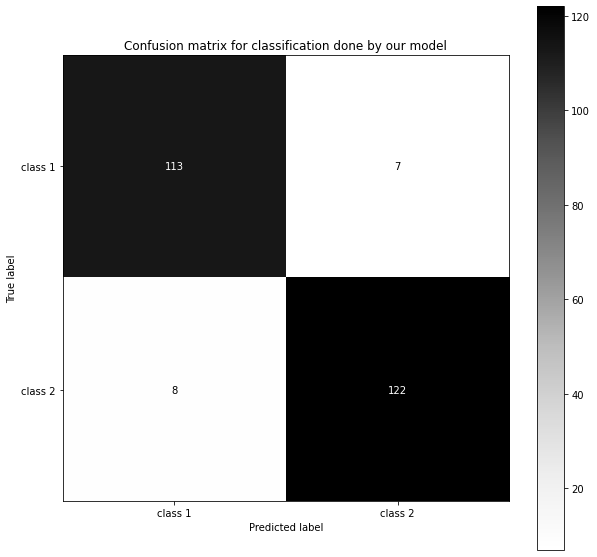

In [12]:
# Extract data
# Do preprocessing if required

# Create class object
data_preprocess_object = DataPreprocess('advertising.csv')

# Encode categorical data
dataset = data_preprocess_object.enocde_categorical_data()

# Define features and target
X, y = data_preprocess_object.extract_features('Clicked on Ad', ['Clicked on Ad', 'Ad Topic Line', 'Timestamp', 'City'])

# Adding non-linear features so that more weightage is 
# given to non-linear features
X['1'] = ((X['Daily Internet Usage'])*(X['Daily Time Spent on Site']))**2
X['2'] = ((X['Daily Internet Usage']))**2
X['3'] = (X['Area Income'])/X['Age']


# data_preprocess_object.plot_bar_chart(y)

# Convert dataframe object to array
X = data_preprocess_object.to_array(X)
y = data_preprocess_object.to_array(y)

# Normalise features
X = data_preprocess_object.normalise(X)

# call logistic regression
# Display the result

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# creating model object
log_regr_model = LogisticRegression(learning_rate=0.01, iterations=20000)

# training
log_regr_model.fit(X_train, y_train, verbose=False)

# predicting
predictions = log_regr_model.predict(X_test)

print()
print('Accuracy from our model for purchase.csv dataset:', np.round(log_regr_model.accuracy(predictions, y_test), 2))
print()
print('Classification report for our model')
print('='*35)
print(classification_report(y_test, predictions, target_names=['class 1', 'class 2']))
print()
fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['class 1', 'class 2'])
disp.plot(cmap=plt.cm.Greys, ax=ax)
plt.title('Confusion matrix for classification done by our model')
plt.show()


log_regr_model_sk_learn = LogisticRegressionSkLearn(random_state=0)
log_regr_model_sk_learn.fit(X_train, y_train)
predictions_sk_learn = log_regr_model_sk_learn.predict(X_test)
print('Accuracy from sklearn model for purchase.csv dataset::', np.round(log_regr_model_sk_learn.score(X_test, y_test), 3))
print()
print('Classification report for sklearn model')
print('='*40)
print(classification_report(y_test, predictions_sk_learn, target_names=['class 1', 'class 2']))
print()
fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test, predictions_sk_learn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['class 1', 'class 2'])
disp.plot(cmap=plt.cm.Greys,ax=ax) 
plt.title('Confusion matrix for classification done by our model')
plt.show()